In [1]:
from os.path import join as pathjoin
import sys
sys.path.insert(0, '/home/mlepekhin/Non-thematic-Text-Classification/code/allennlp_experiments')

from data_processing import *
from interpretation import *
from models import *
from training import *

In [2]:
DATA_DIR = '/home/mlepekhin/data'
MODELS_DIR = '/home/mlepekhin/models'
MODEL_ID = 'allennlp_xlm_roberta_enru_clean_1' 
CHECKPOINTS_DIR = pathjoin(MODELS_DIR, MODEL_ID, 'checkpoints')
BEST_MODEL = pathjoin(CHECKPOINTS_DIR, 'best.th')

In [3]:
transformer_model = 'xlm-roberta-base'
MAX_TOKENS = 512

### Loading of the pretrained model

In [4]:
vocab = Vocabulary().from_files(pathjoin(MODELS_DIR, MODEL_ID, 'vocab'))
model = build_pool_transformer_model(vocab, transformer_model)

01262021 21:11:45|INFO|allennlp.data.vocabulary| Loading token dictionary from /home/mlepekhin/models/allennlp_xlm_roberta_enru_clean_1/vocab.
01262021 21:11:45|INFO|filelock| Lock 140681453098800 acquired on /home/mlepekhin/models/allennlp_xlm_roberta_enru_clean_1/vocab/.lock
01262021 21:11:46|INFO|filelock| Lock 140681453098800 released on /home/mlepekhin/models/allennlp_xlm_roberta_enru_clean_1/vocab/.lock


Building the model


01262021 21:11:46|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at /home/mlepekhin/.cache/torch/transformers/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
01262021 21:11:46|INFO|transformers.configuration_utils| Model config XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1,
  "vocab_size": 250002
}

01262021 21:11:47|INFO|transformers.modeling_util

In [5]:
id_to_label = vocab.get_index_to_token_vocabulary('labels')
print(id_to_label)
print(id_to_label.values())

{0: 'A8', 1: 'A1', 2: 'A12', 3: 'A14', 4: 'A11', 5: 'A16', 6: 'A7', 7: 'A17', 8: 'A4', 9: 'A9', 10: 'A22'}
dict_values(['A8', 'A1', 'A12', 'A14', 'A11', 'A16', 'A7', 'A17', 'A4', 'A9', 'A22'])


In [6]:
if torch.cuda.is_available():
    cuda_device = 2
else:
    cuda_device = -1
print(cuda_device)
model.load_state_dict(torch.load(BEST_MODEL, map_location=f'cuda:{cuda_device}'))

2


<All keys matched successfully>

### Data loading

In [7]:
en_test_df = pd.read_csv('/home/mlepekhin/ru-gpts/ru_medium_generated_texts/ru_medium_all_50.csv')
en_test_df.head()

,Unnamed: 0,Unnamed: 0.1,prefix,target,text,topic
0,0,0,"может быть , те процессы , которые произошли с...",A1,"может быть, те процессы, которые произошли с м...",arhitecture
1,1,1,"там есть три варианта - самый короткий , самый...",A1,"там есть три варианта - самый короткий, самый ...",arhitecture
2,2,2,"только полнокомплектные системы , в которых пр...",A1,"только полнокомплектные системы, в которых пре...",arhitecture
3,3,3,в настоящее время госрегистрация договоров об ...,A1,в настоящее время госрегистрация договоров об ...,arhitecture
4,4,4,монтаж справочник поиск качественные инженерны...,A1,монтаж справочник поиск качественные инженерны...,arhitecture


In [8]:
true_classes = en_test_df.target.values
sentences = en_test_df.text.values

### Preliminary analysis

In [9]:
dataset_reader = build_transformer_dataset_reader(transformer_model, MAX_TOKENS)
predictor = TextClassifierPredictor(model, dataset_reader=dataset_reader)
predicted_classes = np.array(predict_classes(sentences, predictor, vocab))

01262021 21:12:28|INFO|transformers.configuration_utils| loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at /home/mlepekhin/.cache/torch/transformers/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
01262021 21:12:28|INFO|transformers.configuration_utils| Model config XLMRobertaConfig {
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1,
  "vocab_size": 250002
}

01262021 21:12:29|INFO|transformers.tokenization_

In [10]:
print(type(predicted_classes == 'A1'))

<class 'numpy.ndarray'>


In [11]:
print(len(np.unique(true_classes)))

10


In [12]:
calc_classifier_metrics(predicted_classes, true_classes)

label (argum) f1_score 0.2777777777777778 precision 0.20089285714285715 recall 0.45
label (fictive) f1_score 0.14285714285714285 precision 0.6666666666666666 recall 0.08
label (instruct) f1_score 0.30638297872340425 precision 0.26666666666666666 recall 0.36
label (reporting) f1_score 0.42902208201892744 precision 0.31336405529953915 recall 0.68
label (legal) f1_score 0.3221476510067114 precision 0.4897959183673469 recall 0.24
label (personal) f1_score 0.3129251700680272 precision 0.48936170212765956 recall 0.23
label (commercial) f1_score 0.37722419928825623 precision 0.292817679558011 recall 0.53
label (research) f1_score 0.05714285714285714 precision 0.6 recall 0.03
label (info) f1_score 0.24000000000000002 precision 0.28 recall 0.21
label (eval) f1_score 0.3137254901960784 precision 0.4528301886792453 recall 0.24
accuracy 0.305


01272021 00:39:26|INFO|numexpr.utils| Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
01272021 00:39:26|INFO|numexpr.utils| NumExpr defaulting to 8 threads.


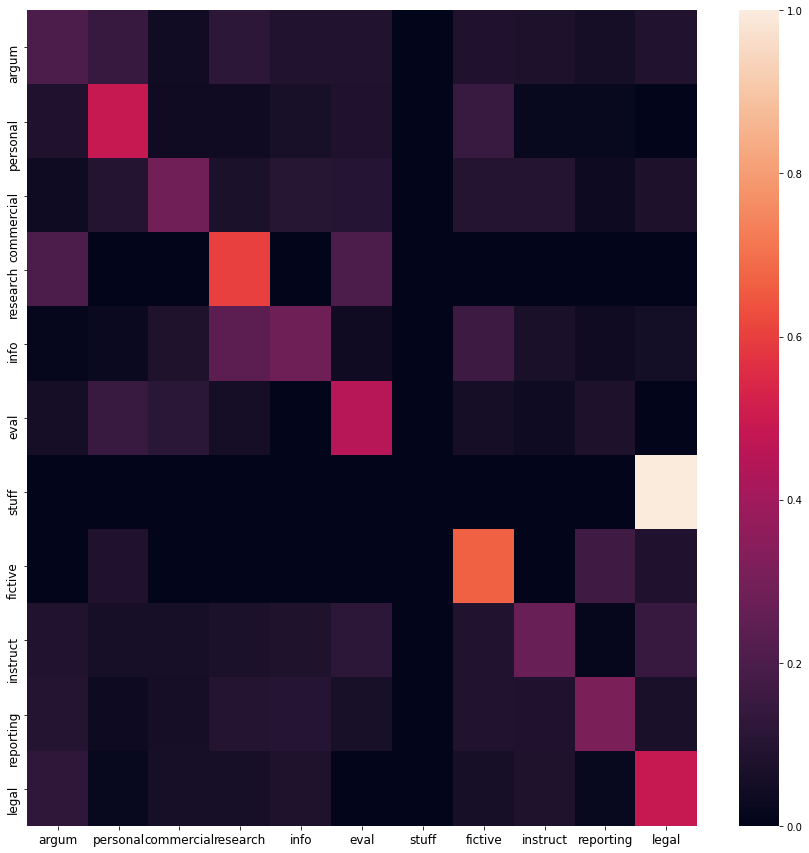

In [13]:
plot_confusion_matrix(predicted_classes, true_classes)

### Saliency Gradient Interpretation

In [14]:
#smooth_grad = SmoothGradient(predictor)
simple_grad = SimpleGradient(predictor)
#integrated_grad = IntegratedGradient(predictor)

In [15]:
mistake_ids = []

for sent_id in range(len(true_classes)):
    if true_classes[sent_id] != predicted_classes[sent_id]:
        mistake_ids.append(sent_id)

In [16]:
interpret_sentence(
    sentences[mistake_ids[0]], dataset_reader.tokenizer, 50, 
    [simple_grad],
    label_description[true_classes[mistake_ids[0]]],
    label_description[predicted_classes[mistake_ids[0]]]
)

TRUE LABEL: eval
LABEL: commercial
<class 'allennlp.interpret.saliency_interpreters.simple_gradient.SimpleGradient'> TEXT:
▁Kawasaki ▁D - Tra cker ▁С ▁недавн их ▁пор ▁Kawasaki ▁d - track er ▁125 ▁официально ▁доступ ен ▁на ▁европейско м ▁рынке ▁ . ▁Это ▁супер мо то - верс ия ▁мал енько го ▁ эн - ду ро ▁K LX ▁125 ▁ . ▁Конечно ▁же ▁ , ▁в ▁Япон ии ▁все ▁не ▁так ▁ , ▁как ▁в ▁Европе ▁ . ▁В ▁категории ▁мало ку ба тур ного ▁Dual ▁Pur pose ▁выпуска ются ▁обе ▁выше указанные ▁125 ▁- ки ▁ , ▁энд уро ▁Stock man ▁250 ▁и ▁хорошо ▁из вест ная ▁многим ▁рай дер ам ▁Super ▁Sher pa ▁ , ▁а ▁также ▁две ▁250 ▁- ки ▁- ▁энд уро ▁K LX ▁250 ▁S ▁и ▁супер мо то ▁K LX ▁250 ▁SF ▁ . ▁После дний ▁- ▁тот ▁самый ▁D - Tra cker ▁ . ▁Kawasaki ▁D - Tra cker ▁X ▁ , ▁который ▁сейчас ▁про дается ▁в ▁Япон ии ▁ , ▁и ▁D - Tra cker ▁' ▁0 ▁0 ▁немного ▁отличаются ▁ . ▁Новый ▁мо тар д ▁получил ▁инж е ктор ▁ , ▁у лучше нные ▁тормоз а ▁ , ▁чуть ▁больш ий ▁бак ▁ . ▁Пре ж ними ▁остались ▁на ▁месте ▁мал ый ▁вес ▁ , ▁ длин но ход ные ▁под

In [17]:
interpret_sentence(
    sentences[mistake_ids[1]], dataset_reader.tokenizer, 50, 
    [simple_grad],
    label_description[true_classes[mistake_ids[1]]],
    label_description[predicted_classes[mistake_ids[1]]]
)

TRUE LABEL: personal
LABEL: eval
<class 'allennlp.interpret.saliency_interpreters.simple_gradient.SimpleGradient'> TEXT:
▁Тест - дра й в ▁La da ▁Grant a ▁: ▁новая ▁надежда ▁авто град а ▁Факт ически ▁ , ▁новая ▁La da ▁Grant a ▁- ▁это ▁стара я ▁La da ▁Kali na ▁плюс ▁400 ▁новых ▁деталей ▁ . ▁Но ▁назвать ▁Гран ту ▁всего ▁лишь ▁ре стай линг ом ▁Калин ы ▁язык ▁не ▁повер н ется ▁ . ▁Авто мобиль ▁действительно ▁измени лся ▁и ▁на ▁самом ▁деле ▁стал ▁лучше ▁пре ж них ▁продуктов ▁Авто ВА За ▁ . ▁Но ▁почива ть ▁на ▁лав рах ▁то ль ят тин цам ▁еще ▁рано ▁ . ▁Kole sa ▁ . ▁R ▁u ▁выяснил и ▁ , ▁почему ▁ . ▁С юр приз ы ▁по джи дали ▁еще ▁до ▁проб ной ▁поездки ▁на ▁La da ▁Grant a ▁ . ▁Про води в ▁меня ▁к ▁машине ▁ , ▁сотрудник ▁авто сал она ▁объяснил ▁мне ▁как ▁пользоваться ▁бре л ком ▁дополнительно й ▁сигнал изации ▁: ▁" ▁Если ▁на жать ▁на ▁эту ▁кнопку ▁и ▁немного ▁по держать ▁ , ▁двигател ь ▁за вед ется ▁! ▁" ▁На жим ает ▁ . ▁Держ ит ▁ . ▁Не ▁за водится ▁ . ▁" ▁Наверное ▁это ▁из - за ▁вашего ▁коллеги ▁

In [18]:
interpret_sentence(
    sentences[mistake_ids[2]], dataset_reader.tokenizer, 50, 
    [simple_grad],
    label_description[true_classes[mistake_ids[2]]],
    label_description[predicted_classes[mistake_ids[2]]]
)

TRUE LABEL: reporting
LABEL: argum
<class 'allennlp.interpret.saliency_interpreters.simple_gradient.SimpleGradient'> TEXT:
▁среда ▁ , ▁2 ▁декабря ▁2009 ▁года ▁ , ▁12. 33 ▁Бу мага ▁всё ▁терп ит ▁Дес ять ▁бы вших ▁союз ных ▁республик ▁пере писали ▁учебник и ▁истории ▁в ▁свою ▁пользу ▁ . ▁Специалист ы ▁Национально й ▁лаборатор ии ▁внешне й ▁политики ▁провели ▁и стори ограф ический ▁анализ ▁187 ▁школьн ых ▁учебник ов ▁12 ▁государств ▁из ▁бы вшего ▁СССР ▁ . ▁ Эксперт ы ▁пришли ▁к ▁выводу ▁ , ▁что ▁на ▁страница х ▁посо бий ▁и ▁книг ▁наши ▁сосед и ▁не ▁только ▁не ▁проч ь ▁воз вели чить ▁свои ▁заслуг и ▁в ▁война х ▁и ▁про чих ▁за вое вания х ▁ , ▁но ▁и ▁на ▁пусто м ▁месте ▁критик уют ▁русских ▁ . ▁Об ъ е ктив ная ▁оценка ▁истории ▁сохран илась ▁только ▁в ▁учебник ах ▁Ар мен ии ▁и ▁Белорус сии ▁ . ▁Други ми ▁словами ▁ , ▁власти ▁10 ▁стран ▁ближ не го ▁за ру беж ья ▁со ▁школьн ой ▁с кам ь и ▁учат ▁детей ▁тому ▁ , ▁что ▁Россия ▁для ▁них ▁опас ный ▁сосед ▁ , ▁а ▁культур ную ▁мисс ию ▁своего ▁народ

In [19]:
words = dict()

In [20]:
for label in id_to_label.values():
    print(label_description[label])
    print('=' * 100)
    cur_dataset = get_dataset_by_confusion_pair(
        sentences, label, label, true_classes, predicted_classes
    )
    words[label] = get_most_frequent_trigger_words(cur_dataset, dataset_reader.tokenizer, 50, simple_grad)
    print(words[label][:100])

reporting
[('▁', 575), ('.', 198), ('▁"', 122), (',', 107), ('▁заявил', 79), ('</s>', 68), ('<s>', 46), ('▁:', 31), ('▁президент', 26), ('▁что', 24), ('▁сообщил', 24), ('▁словам', 21), ('▁»', 20), ('▁в', 20), ('▁«', 18), ('▁этом', 16), ('▁и', 16), ('>', 16), ('▁сказал', 16), ('▁США', 16), ('▁России', 15), ('</', 14), ('▁РФ', 14), ('▁сообщает', 13), ('▁)', 13), ('▁президента', 13), ('▁Президент', 13), ('▁Россия', 12), ('▁...', 12), ('▁не', 11), ('ga', 11), ('▁Новости', 11), ('▁Медведев', 11), ('▁В', 10), ('▁было', 10), ('▁на', 10), ('▁(', 10), ('▁будет', 10), ('▁апреля', 9), ('▁пресс', 9), ('я', 9), ('▁Дмитрий', 9), ('▁Напомним', 9), ('▁года', 8), ('конференц', 8), ('▁Москвы', 8), ('▁Украины', 8), ('▁власти', 8), ('▁отметил', 8), ('▁--', 8), ('▁Как', 7), ('▁сегодня', 7), ('ов', 7), ('▁2009', 7), ('▁нефти', 7), ('▁Рус', 7), ('нефть', 7), ('▁его', 7), ('▁Турци', 7), ('е', 7), ('▁будут', 7), ('▁ходе', 7), ('▁2012', 7), ('▁Тимошенко', 7), ('▁Афганистан', 7), ('▁проблемы', 7), ('▁2011', 6), 

[('▁', 87), ('.', 31), ('<s>', 8), ('▁гаджет', 7), (',', 7), ('</s>', 7), ('▁!', 6), ('▁мы', 5), ('▁можно', 5), ('▁нажмите', 4), ('▁што', 4), ('▁)', 4), ('▁фотографии', 4), ('▁(', 4), ('▁обсужден', 4), ('▁•', 3), ('▁работе', 3), ('▁PSD', 3), ('▁картинки', 3), ('▁фото', 3), ('▁вашем', 3), ('▁можете', 3), ('▁:', 3), ('▁нужно', 3), ('ьте', 3), ('▁?', 3), ('▁вред', 3), ('>', 3), ('▁Twitter', 3), ('▁муз', 2), ('вайте', 2), ('ск', 2), ('▁1', 2), ('▁кнопку', 2), ('▁эту', 2), ('▁поэтому', 2), ('▁В', 2), ('▁ознаком', 2), ('▁правилами', 2), ('рез', 2), ('тесь', 2), ('рки', 2), ('▁я', 2), ('▁комп', 2), ('▁что', 2), ('▁формат', 2), ('▁там', 2), ('▁вариант', 2), ('▁интернет', 2), ('груз', 2), ('▁Bluetooth', 2), ('чный', 2), ('▁Однако', 2), ('шту', 2), ('провод', 2), ('▁устройства', 2), ('▁торгов', 2), ('▁обман', 2), ('шен', 2), ('▁мани', 2), ('чества', 2), ('ни', 2), ('▁холодильник', 2), ('▁вы', 2), ('▁только', 2), ('▁повез', 2), ('▁вклад', 2), ('▁i', 2), ('Google', 2), ('▁это', 2), ('▁подели', 2),

In [25]:
conflict_pairs = [
    ('research', 'info'), ('personal', 'eval'), ('info', 'reporting'), ('personal', 'instruct'), ('legal', 'argum'),
    ('info', 'research'), ('eval', 'personal'), ('reporting', 'info'), ('instruct', 'personal'), ('argum', 'legal')
]

In [26]:
print(description_to_label)

{'argum': 'A1', 'emotive': 'A3', 'fictive': 'A4', 'flippant': 'A5', 'informal': 'A6', 'instruct': 'A7', 'reporting': 'A8', 'legal': 'A9', 'personal': 'A11', 'commercial': 'A12', 'propaganda': 'A13', 'research': 'A14', 'specialist': 'A15', 'info': 'A16', 'eval': 'A17', 'poetic': 'A19', 'appeal': 'A20', 'stuff': 'A22'}


In [24]:
import tqdm

with open('xlm_roberta_conflict_keywords_ru.txt', 'w') as fout:
    for label_pair in tqdm.tqdm(conflict_pairs):
        print(label_pair[1], 'instead of ', label_pair[0])
        label0, label1 = description_to_label[label_pair[0]], description_to_label[label_pair[1]]
        print('=' * 100)
        cur_dataset = get_dataset_by_confusion_pair(
            sentences, label0, label1, true_classes, predicted_classes
        )
        cur_words = get_most_frequent_trigger_words(cur_dataset, dataset_reader.tokenizer, 50, smooth_grad)
        print(cur_words[:100])
        for word in cur_words[:50]:
            fout.write(f'{label_pair[0]} {label_pair[1]} {word}\n')

  0%|          | 0/10 [00:00<?, ?it/s]

info instead of  research


NameError: name 'smooth_grad' is not defined